In [15]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt


In [16]:
boston_df = pd.read_csv('../dmba/BostonHousing.csv')


### get a sense of the dataset

In [5]:
boston_df.shape

(506, 14)

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [7]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [ ]:
### rename column for easier data handling

In [12]:
boston_df = boston_df.rename(columns={'CAT.MDV': 'CAT_MEDV', 'CAT. MEDV':'CAT_MEDV'})

In [13]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


## Amtrak data set

In [24]:
Amtrak_df = pd.read_csv('../dmba/Amtrak.csv', squeeze=True)


In [25]:
# Amtrak data shape
Amtrak_df.shape
Amtrak_df.head(5)

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


In [26]:
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')

Amtrak_df.head(5)

,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01


In [27]:
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)

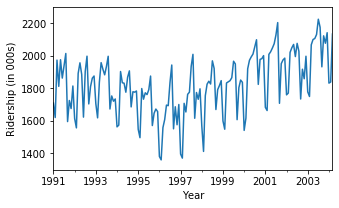

In [30]:
ridership_ts.plot(ylim=[1300, 2300], legend=False, figsize=[5, 3])
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label


plt.show()

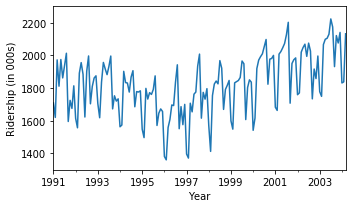

In [31]:
# now with a tigher layout
ridership_ts.plot(ylim=[1300, 2300], legend=False, figsize=[5, 3])
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label
plt.tight_layout()

plt.show()

Text(0, 0.5, 'Ridership (in 000s)')

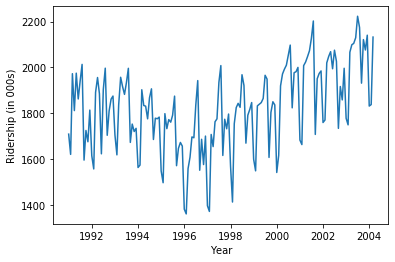

In [32]:
## alternative using matplotlib
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

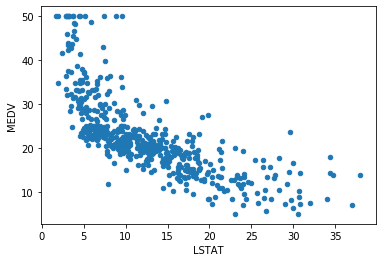

In [35]:
# now scatterplot Boston housing data
boston_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

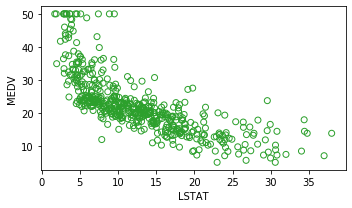

In [42]:
# Set the color of the points in the scatterplot and draw as open circles.
# we are using the column data of LSTAT and MEDV on the axis
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(boston_df.LSTAT, boston_df.MEDV, color='C2', facecolor='none')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

In [ ]:
# create bar chart using boston dataframe

In [45]:
boston_df['CHAS'].min()

0

In [46]:
boston_df['CHAS'].max()

1

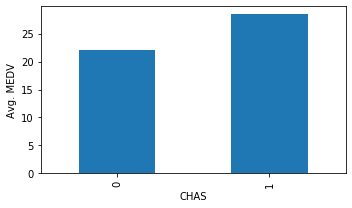

In [48]:
ax = boston_df.groupby('CHAS').mean().MEDV.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Avg. MEDV')

plt.tight_layout()
plt.show()

## Distribution Plots time

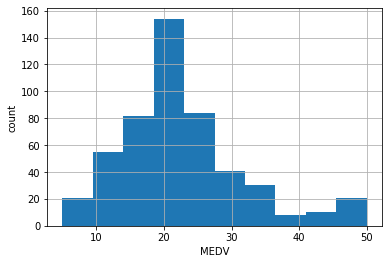

In [49]:
ax = boston_df.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

plt.show()

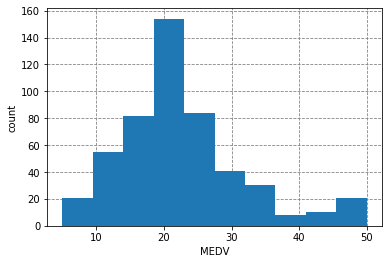

In [51]:
# matplotlib 
fig, ax = plt.subplots()
ax.hist(boston_df.MEDV)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('MEDV')
ax.set_ylabel('count')
plt.show()